# Bollywood Songs Recommendation System  ----  Utkarsh Tripathi


### Not Working Properly

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [99]:
df = pd.read_csv('Bollywood Songs data.csv')
df

,index,Song,Singer,Genre,Movie,User-Rating
0,1,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,2,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,3,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,4,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,5,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10
...,...,...,...,...,...,...
2415,2416,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,10-Oct
2416,2417,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,10-Oct
2417,2418,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,10-Oct
2418,2419,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,10-Oct


In [161]:
song_feature = df[['Singer', 'Movie']]
song_feature[:3]

,Singer,Movie
0,"Kumar Sanu, Mika Singh, Neha Kakkar",Simmba
1,"Neha Kakkar, Tony Kakkar",Luka Chuppi
2,Ranveer Singh,Gully Boy


In [162]:
song_feature.isnull().sum()

Singer    10
Movie      3
dtype: int64

<AxesSubplot:>

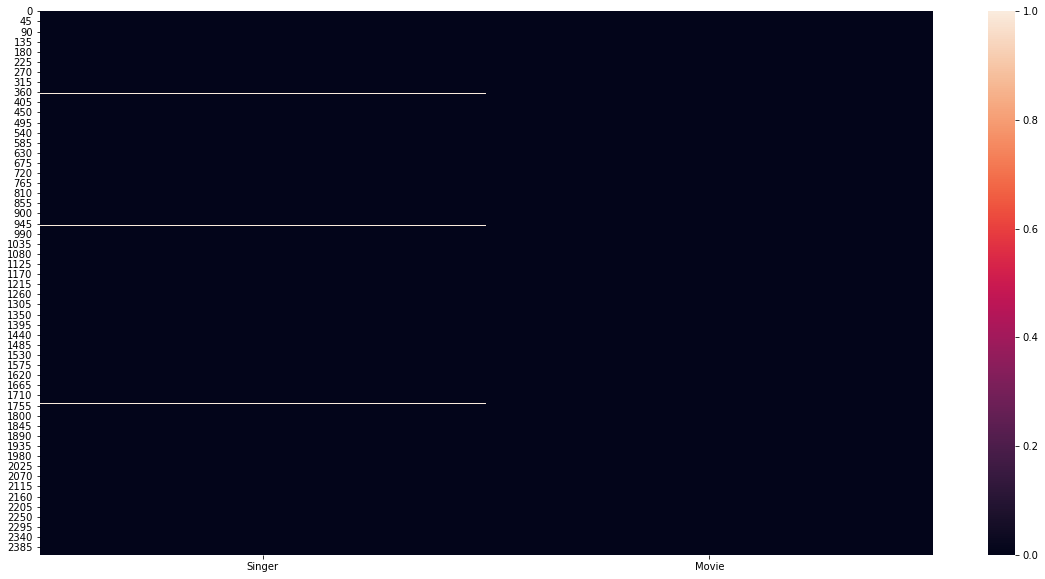

In [163]:
plt.figure(figsize = (20,10))
sb.heatmap(song_feature.isnull())

In [164]:
for i in song_feature:
    song_feature[i] = song_feature[i].fillna('')

<ipython-input-164-3245be60e77a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_feature[i] = song_feature[i].fillna('')


In [165]:
song_feature.isnull().sum()

Singer    0
Movie     0
dtype: int64

In [166]:
L = song_feature['Movie'].value_counts()
L    

Bajirao Mastani                         10
Devdas                                  10
Goliyon Ki Rasleela Ram-leela            9
Chaudhvin Ka Chand                       9
Yeh Jawaani Hai Deewani                  9
                                        ..
Lagaan                                   1
Ekkees Toppon Ki Salaami                 1
Lucky                                    1
Bollywood HeightsMiley Naa Miley Hum     1
Saansein                                 1
Name: Movie, Length: 903, dtype: int64

## ab hum list me convert karenge

In [167]:
combine_song_feature = song_feature['Singer'] + ' ' + song_feature['Movie']
combine_song_feature 

0              Kumar Sanu, Mika Singh, Neha Kakkar Simmba
1                    Neha Kakkar, Tony Kakkar Luka Chuppi
2                                 Ranveer Singh Gully Boy
3       Jyotica Tangri, Shaan, Subhro Ganguly Total Dh...
4       Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagc...
                              ...                        
2415                                       Mukesh Sasural
2416            Lata Mangeshkar Jab Pyar Kisi Se Hota Hai
2417                 Lata Mangeshkar, Suresh Wadkar Lamhe
2418                        Jagjit Kaur Shola Aur Shabnam
2419                        Asha Bhosle Shola Aur Shabnam
Length: 2420, dtype: object

In [168]:
vector_feature = TfidfVectorizer().fit_transform(combine_song_feature )
print(vector_feature) 

  (0, 1821)	0.60219480332348
  (0, 946)	0.3602434982013823
  (0, 1350)	0.3614385593704536
  (0, 1824)	0.2419865234013994
  (0, 1236)	0.3835564851639034
  (0, 1691)	0.32315803461966935
  (0, 1074)	0.25854214065719683
  (1, 433)	0.4670877847719043
  (1, 1126)	0.4670877847719043
  (1, 1972)	0.41564545662932256
  (1, 946)	0.5588402178986535
  (1, 1350)	0.2803470489877459
  (2, 357)	0.5495283052315627
  (2, 690)	0.5666008748051642
  (2, 1562)	0.5666008748051642
  (2, 1824)	0.23652809365775462
  (3, 518)	0.3848940858171981
  (3, 1976)	0.42091908742530165
  (3, 633)	0.42091908742530165
  (3, 1870)	0.42091908742530165
  (3, 1733)	0.24773411862745165
  (3, 1931)	0.35580912345176247
  (3, 925)	0.36382081078803813
  (4, 237)	0.44453168863813
  (4, 1932)	0.4064857665679326
  :	:
  (2415, 1705)	0.793781274347791
  (2415, 1287)	0.608203328250345
  (2416, 1046)	0.4570019351722291
  (2416, 1173)	0.24264638103279762
  (2416, 1103)	0.24388208375569725
  (2416, 780)	0.4117502756703276
  (2416, 1502)	0.37

In [169]:
similarity = cosine_similarity(vector_feature)
similarity

array([[1.        , 0.30264679, 0.05723661, ..., 0.        , 0.        ,
        0.        ],
       [0.30264679, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05723661, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.72923401],
       [0.        , 0.        , 0.        , ..., 0.        , 0.72923401,
        1.        ]])

In [170]:
similarity.shape

(2420, 2420)

In [172]:
song_title = df['Song'].to_list()
song_title

['Aankh Marey',
 'Coca Cola',
 'Apna Time Aayega',
 'Mungda',
 'Tere Bin',
 'Gali Gali',
 'Chamma Chamma',
 'Mere Gully Mein',
 'Kamariya',
 'Ek Ladki Ko Dekha Toh Aisa Laga',
 'Swag Se Swagat',
 'Poster Lagwa Do',
 'Daaru Wargi',
 'Dilbar',
 'Proper Patola',
 'Doori',
 'Dil Diyan Gallan',
 'Husn Parcham',
 'Bom Diggy Diggy',
 'Issaqbaazi',
 'Mere Naam Tu',
 'High Rated Gabru � Nawabzaade',
 'Dekhte Dekhte',
 'Zingaat',
 'Tareefan',
 'Mile Ho Tum (Reprise)',
 'Dil Chori',
 'Tere Naal Nachna',
 'Dil Meri Na Sune',
 'Dhadak Title Track',
 'Heeriye',
 'Chogada',
 'Gud Naal Ishq Mitha',
 'Paniyon Sa',
 'Milegi Milegi',
 'Morni Banke',
 'Bhare Bazaar',
 'Khalibali',
 'Aao Kabhi Haveli Pe',
 'Badri Ki Dulhania',
 'Cheez Badi',
 'Dholida',
 'Sweetheart',
 'Namo Namo',
 'Qaafirana',
 'Tu Hi Re',
 'Chhote Chhote Peg',
 'Galti Se Mistake',
 'Phir Mulaaqat',
 'Kala Chashma',
 'Mantoiyat',
 'Nashe Si Chadh Gayi',
 'Mera Pyar Tera Pyar',
 'Ding Dang',
 'Main Tera Boyfriend',
 'Laila Main Laila',
 '

In [173]:
song_name = input("enter song Name  -->  ")

enter song Name  -->  diya


In [174]:
find_close_match = difflib.get_close_matches(song_name, song_title)
print(find_close_match)

['Vadiya', 'Mundiyan', 'Pardesiya']


In [175]:
find_close_match = find_close_match[0]
find_close_match

'Vadiya'

In [176]:
index_of_song = df[df.Song == find_close_match]['index'].values[0]
print(index_of_song)

1921


In [177]:
similarity_score = list(enumerate(similarity[index_of_song]))

print(similarity_score)

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.1349899657811979), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.23837560735652774), (48, 0.0), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.2110322063446655), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.06026889598379149), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.0), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.0), (70, 0.0), (71, 0.0), (72, 0.0), (73, 0.0), (74, 0.0), (75, 0.18460169665054388), (76, 0.0), (77, 0.0), (78, 0.0), (79, 0.0), (80, 0.0), (81, 0.0), (82, 0.0), (83, 0.0), (84, 0.

In [178]:
sorted_similar_songs = sorted(similarity_score, key = lambda x:x[1], reverse = True )

print(sorted_similar_songs)

[(1921, 1.0), (995, 0.3157248553687545), (291, 0.30296557385631184), (1233, 0.29825549634878756), (1839, 0.28413627216612247), (1768, 0.2658546072951192), (47, 0.23837560735652774), (224, 0.23619172043714293), (480, 0.23563515390337947), (219, 0.21850549391693427), (221, 0.21850549391693427), (1566, 0.21382424988631568), (53, 0.2110322063446655), (616, 0.20875374621002563), (2079, 0.20579223095593502), (1024, 0.19987029870282624), (1011, 0.19886162278730024), (188, 0.19493997301543578), (105, 0.1931684755677332), (776, 0.18981203817313158), (851, 0.1896102754466319), (75, 0.18460169665054388), (1945, 0.18368909250852136), (951, 0.1800261001006015), (1694, 0.1772098055056887), (1235, 0.17389205840233662), (1757, 0.17141958579631092), (1999, 0.1709054436766433), (1073, 0.16668323166507276), (686, 0.16115784572360672), (768, 0.15723890480053174), (750, 0.15307852305431796), (1420, 0.1530121368233178), (1421, 0.1485180463347385), (1345, 0.14547545381843402), (1494, 0.13960902524567137), (7

In [183]:
i = 1


for song in sorted_similar_songs:
    index = song[0]
    title_from_index = df[df.index == index]['Song'].values[0]
    
    if (i<30):
        print(i , ' -->' ,   title_from_index)
        i += 1

1  --> Sukh Karta (Ganpati Aarti)
2  --> Tanhaiyaan
3  --> Suno Ganpati Bappa Morya
4  --> Seedha Saadha
5  --> Lamha Lamha
6  --> Kahin Karti Hogi Woh Mera Intezar
7  --> Galti Se Mistake
8  --> Radio
9  --> Sau Tarah Ke
10  --> Naam Hai Bhaiaji
11  --> Naam Hai Bhaiaji
12  --> Gore Gore Se
13  --> Ding Dang
14  --> Itna Sannata Kyun Hai
15  --> Majboor Tu Bhi Kahin
16  --> Zindagi Tujhse Kya Karen Shikvey
17  --> Meer-E-Kaarwan
18  --> Manma Emotion Jaage
19  --> Bulleya
20  --> Ladki Kyon Na Jane Kyon
21  --> Shuru Kar
22  --> Allah Duhai Hai
23  --> Yaara Yaara
24  --> Tum Bin
25  --> Rabba Meray Haal Da Mehram Tu
26  --> Koi Fariyaad
27  --> Guest In London
28  --> Jeeley Yeh Lamhe
29  --> Tum Bin


In [186]:

song_name = input("enter song Name  -->  ")

song_title = df['Song'].to_list()

find_close_match = difflib.get_close_matches(song_name, song_title)

find_close_match = find_close_match[0]

index_of_song = df[df.Song == find_close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_song]))

sorted_similar_songs = sorted(similarity_score, key = lambda x:x[1], reverse = True )


i = 1


for song in sorted_similar_songs:
    index = song[0]
    title_from_index = df[df.index == index]['Song'].values[0]
    
    if (i<30):
        print(i , ' -->' ,   title_from_index)
        i += 1

enter song Name  -->  Sukh Karta
1  --> Humko Humise Chura Lo
2  --> Humko Humise Chura Lo
3  --> Zinda Rehti Hain Mohabbatein
4  --> Dekhen Bhi To Kya Dekhen
5  --> Har Subah Yaad Rakhna
6  --> Yeh Hum Aa Gaye Hain Kahaan
7  --> Aankhein Khuli
8  --> Dholna
9  --> Dil To Pagal Hai
10  --> Are Re Are
11  --> Koi Ladki Hai
12  --> Bholi Si Surat
13  --> Pyar Kar
14  --> Khambe Jaisi Khadi Hai
15  --> Andekhi Anjaani
16  --> Mehndi Laga Ke Rakhna
17  --> Ho Gaya Hai Tujhko To Pyar Sajna
18  --> Dhiktana � 2
19  --> Morey Piya
20  --> Woh Chand Jaisi Ladki
21  --> Woh Chand Jaisi Ladki
22  --> Jugnu
23  --> Sun Le Meri Payal Ke Geet
24  --> Ek Dilruba Hai
25  --> Mere Khwabon Ka
26  --> Ghoongte Mein Chanda
27  --> Meri Bindiya Teri Nindiya
28  --> Mohe Chedo Na
29  --> Gudiya Rani


'Sukh Karta (Ganpati Aarti)'